# Script for network generation

**Imports:**

In [84]:
import numpy as np
import networkx as nx
import pandas as pd
from pyvis.network import Network
import matplotlib.pyplot as plt

**General functions:**

In [85]:
def properties(graph):
    print(f"""
Number of nodes: {graph.number_of_nodes()}
Number of edges: {graph.number_of_edges()}
""", end="")
    
    graph_copy = graph.copy()
    if nx.is_connected(graph_copy) == False:
        print("The graph is not connected, so the following (text) only applies to the largest component!")
        graph_copy = nx.Graph(
            graph_copy.subgraph(
                sorted(nx.connected_components(graph.copy()), reverse=True)[0]
                ).copy()
            )
    else:
        print("Is graph connected: True")
        
    print(f"""\
Diameter: {nx.diameter(graph_copy)}
Radius: {nx.radius(graph_copy)}
Is bipartite {nx.is_bipartite(graph)}
    """)
    

    df = pd.DataFrame(
        {
            "Node" : graph.nodes,
            "Degree" : dict(nx.degree(graph)).values(), 
            "Betweenness" : nx.betweenness_centrality(graph).values(),
            "Closeness" : nx.closeness_centrality(graph).values(),
        }
    )
    display(df)


def show_html(graph, name="nx", size="small", more=False, gen_html=False):
    """
    Generate and display the graph through pyvis
    """
    if gen_html:
        in_ipynb = {"notebook":True, "cdn_resources":"remote"}
        
        if size == "small":
            s = {"height":"500px", "width":"500px"}
        else:
            s = {"height":"1080px", "width":"1920px"}
        
        if more:
            m = {"select_menu":True, "filter_menu":True}
            nt = Network(**s, **m, **in_ipynb)
            nt.show_buttons(filter_="physics")
            nt.from_nx(graph)
        else:
            nt = Network(**s, **in_ipynb)
            nt.from_nx(graph)
        
            nt.show(f"networks/{name}.html")
    else:
        pos = nx.spring_layout(graph, seed=200)
        nx.draw(graph, pos, with_labels=True)
        plt.show()

## Erdos-Renyi (ER) network:

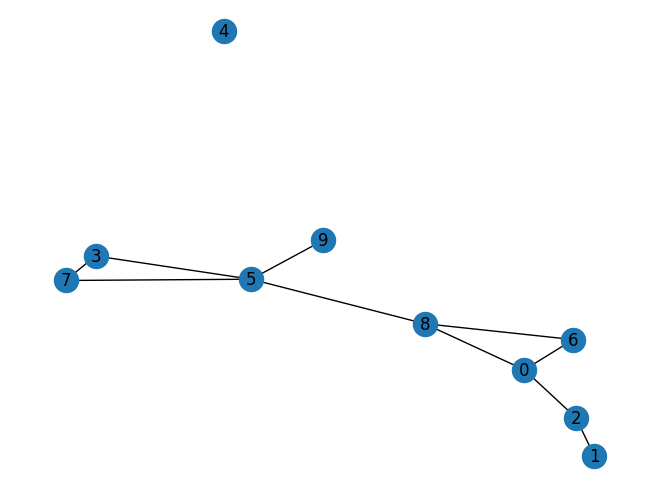


Number of nodes: 10
Number of edges: 10
The graph is not connected, so the following (text) only applies to the largest component!
Diameter: 5
Radius: 3
Is bipartite False
    


,Node,Degree,Betweenness,Closeness
0,0,3,0.333333,0.444444
1,1,1,0.000000,0.253968
2,2,2,0.194444,0.338624
3,3,2,0.000000,0.338624
4,4,0,0.000000,0.000000
5,5,4,0.472222,0.474074
6,6,2,0.000000,0.395062
7,7,2,0.000000,0.338624
8,8,3,0.444444,0.507937
9,9,1,0.000000,0.323232


In [86]:
N = 10  # Number of nodes
E = 10  # Number of edges

ER = nx.gnm_random_graph(N, E)
show_html(ER, name=f"ER_G({N},{E})", gen_html=False)
properties(ER)


## Barabasi-Albert (BA) network:

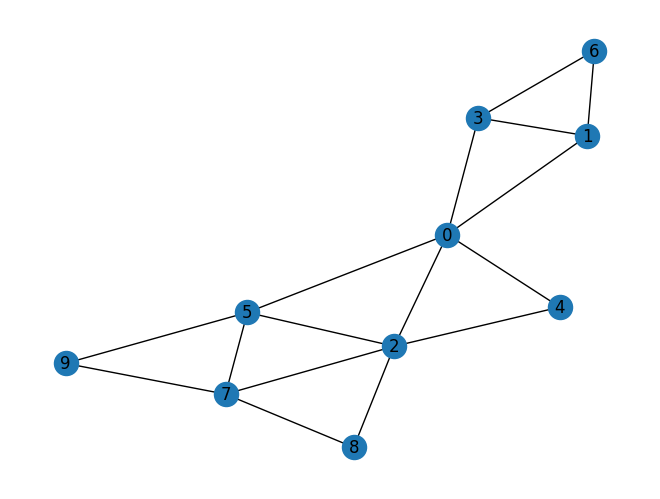


Number of nodes: 10
Number of edges: 16
Is graph connected: True
Diameter: 4
Radius: 2
Is bipartite False
    


,Node,Degree,Betweenness,Closeness
0,0,5,0.523148,0.692308
1,1,3,0.097222,0.500000
2,2,5,0.268519,0.642857
3,3,3,0.097222,0.500000
4,4,2,0.000000,0.500000
5,5,4,0.199074,0.600000
6,6,2,0.000000,0.360000
7,7,4,0.064815,0.500000
8,8,2,0.000000,0.450000
9,9,2,0.000000,0.428571


In [87]:
N = 10  # Number of nodes
m = 2  # Minimum number of edges per node

BA = nx.barabasi_albert_graph(N, m)
show_html(BA, name=f"BA_G({N},{m})", gen_html=False)
properties(BA)

## Watts-Strogatz (WS) network

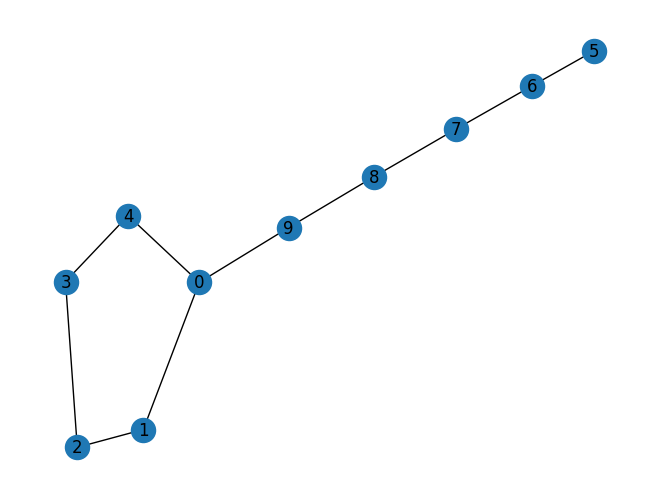


Number of nodes: 10
Number of edges: 10
Is graph connected: True
Diameter: 7
Radius: 4
Is bipartite False
    


,Node,Degree,Betweenness,Closeness
0,0,3,0.583333,0.428571
1,1,2,0.166667,0.346154
2,2,2,0.027778,0.290323
3,3,2,0.027778,0.290323
4,4,2,0.166667,0.346154
5,5,1,0.000000,0.219512
6,6,2,0.222222,0.272727
7,7,2,0.388889,0.333333
8,8,2,0.500000,0.391304
9,9,2,0.555556,0.428571


In [88]:
N = 10
k = 2
p = 0.1

WS = nx.watts_strogatz_graph(N,k,p)
show_html(WS, name=f"WS_G({N},{k},{p})", gen_html=False)
properties(WS)